## Programas para el apartado 3.

#### Descripción del programa en C:

Partimos del programa apartado1.c. He implementado una función que pueda calcular la temperatura como en histograma.c. 

Se siguen manteniendo los datos de N=20, T_TOTAL=60s, caja de L=10 y paso h=0.002.

Para simular el aumento de la temperatura, se aumentará la variable 'mod', la misma descrita en el apartado 2 que simula el módulo de la velocidad.

El programa calculará la presión, temperatura y velocidad cuadrática y lo mostrará por pantalla. Deberá ser puesto A MANO en el fichero apartado3.txt.


#### Descripción del programa en python:

Tenemos de nuevo los programas del apartado 1 de la animación de la simulación y la energía.

El programa 4 indica la linealidad entre la presión y la temperatura. Ambas van con la velocidad al cuadrado como se explica más adelante. Se realiza tanto un ajuste lineal dando la pendiente y el coeficiente de pearson, comprobando así la linealidad de los datos.





### 1º Programa: animar N partículas para una caja de lado L

Este programa sirva para hacer la animación de todas las partículas dentro de la caja. Para ello cojemos los datos de posiciones.txt y lo ploteamos. El programa pondrá un punto en cada posición y con un paso temporal lo suficientemente pequeño lo veremos continuo.

Este programa es visual, podemos observar la atracción pero sobretodo la repulsión de las partículas entre ellas.

Para ello defino una función que lea el archivo en cuestión (posiciones.txt) y otra función que las anime.

Con copilot (a parte de ayudarme con las autocompletaciones y comentarios) he implementado una opción para hacer video o gif, según el tiempo que tenga para hacer el ploteo de la animación.

NECESITA:

- posiciones.txt
- N
- L

Suelta:

- simulacion_N_L.mp4 o un gif.


C:\Users\diego\AppData\Local\Temp\ipykernel_29564\2347788365.py:47: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


Video guardado como 'simulacion_N20_L10.0.mp4'.


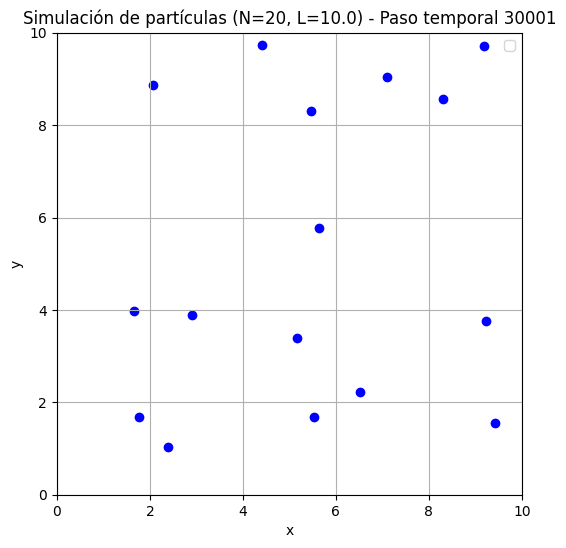

In [4]:
#FUNCION PARA ANIMAR LAS PARTICULAS

#ANCHO DE LA CAJA:

L=10.0
N=20



import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
import matplotlib.animation as animation

# Función para leer las posiciones
def leer_posiciones(filename):
    posiciones = []  # Lista para almacenar las posiciones de cada paso temporal

    with open(filename, 'r') as file:
        paso_actual = []  

        for linea in file:
            linea = linea.strip()
            if linea:  
                datos = linea.split(",")  
                r1x, r1y = float(datos[0]), float(datos[1])  
                paso_actual.append((r1x, r1y))
            else:  
                if paso_actual:  
                    posiciones.append(paso_actual)
                    paso_actual = []  

        # Añadimos el último paso si no está vacío
        if paso_actual:
            posiciones.append(paso_actual)

    return posiciones

# Función para crear la animación
def crear_animacion(posiciones, caja_lado=L, intervalo=1, guardar_gif=False, guardar_video=False):
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_xlim(0, caja_lado)
    ax.set_ylim(0, caja_lado)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_title(f"Simulación de partículas (N={N}, L={L})")
    scatter = ax.scatter([], [], c='blue')
    ax.legend()
    ax.grid(True)


    # Función para actualizar los datos en cada frame
    def actualizar(frame):
        paso = posiciones[frame]
        x = [pos[0] for pos in paso]
        y = [pos[1] for pos in paso]
        scatter.set_offsets(list(zip(x, y)))
        ax.set_title(f"Simulación de partículas (N={N}, L={L}) - Paso temporal {frame + 1}")


    # Crear la animación
    anim = FuncAnimation(fig, actualizar, frames=len(posiciones), interval=intervalo)

    # Guardar como GIF
    if guardar_gif:
        gif_writer = PillowWriter(fps=1000 // intervalo)
        anim.save(f"simulacion_N{N}_L{L}.gif", writer=gif_writer)
        print(f"GIF guardado como 'simulacion_N{N}_L{L}.gif'.")

    # Guardar como video
    if guardar_video:
        video_writer = animation.FFMpegWriter(fps=1000 // intervalo)
        anim.save(f"simulacion_N{N}_L{L}.mp4", writer=video_writer)
        print(f"Video guardado como 'simulacion_N{N}_L{L}.mp4'.")

    plt.show()

# Uso el programa
if __name__ == "__main__":
    archivo = "SALIDA.txt"  
    posiciones = leer_posiciones(archivo)


    # Cambia guardar_gif o guardar_video a True si deseas guardar la animación
    crear_animacion(posiciones, caja_lado=L, intervalo=1, guardar_gif=False, guardar_video=True)

### 2º Programa: Ploteo de energía


#### 2.1 Ploteo fijo de la energía

Este programa coge los datos de energia.txt y plotea 3 curvas, la energía cinética, potencial y total.
Toma solo una imagen por lo que es increblemente rápido.

Necesita:
- energia.txt
- N
- L

Suelta:
- Energia_N_L.png

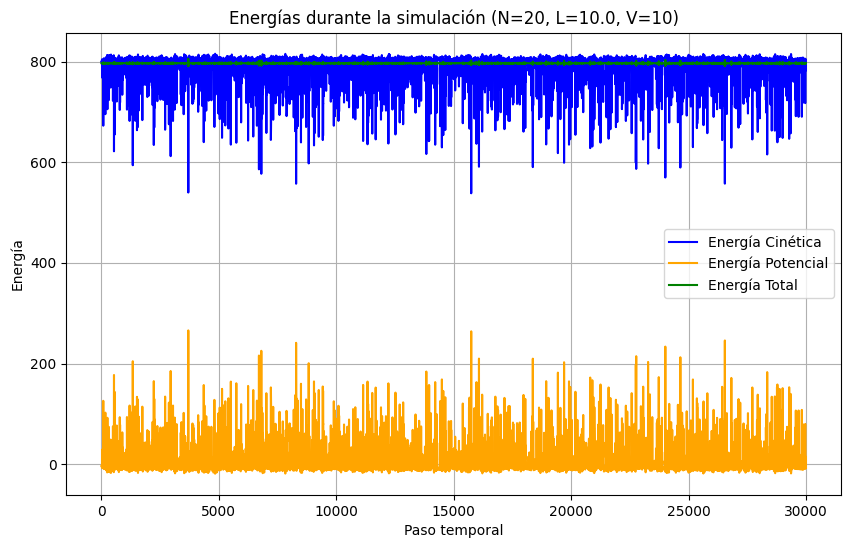

In [3]:
# PLOT DE ENERGIA


#PON LAS DIMENSIONES

L=10.0
N=20

import matplotlib.pyplot as plt

# Función para leer los datos de energía desde el archivo
def leer_energia(filename):
    energia_cinetica = []
    energia_potencial = []
    energia_total = []

    with open(filename, 'r') as file:
        for linea in file:
            datos = linea.strip().split(",")
            if len(datos) == 3:  # Asegurarse de que haya tres columnas
                energia_cinetica.append(float(datos[0]))
                energia_potencial.append(float(datos[1]))
                energia_total.append(float(datos[2]))

    return energia_cinetica, energia_potencial, energia_total

# Función para graficar las energías
def graficar_energias(energia_cinetica, energia_potencial, energia_total):
    pasos = range(len(energia_cinetica))  

    plt.figure(figsize=(10, 6))
    plt.plot(pasos, energia_cinetica, label="Energía Cinética", color="blue")
    plt.plot(pasos, energia_potencial, label="Energía Potencial", color="orange")
    plt.plot(pasos, energia_total, label="Energía Total", color="green")
    plt.xlabel("Paso temporal")
    plt.ylabel("Energía")
    plt.title(f"Energías durante la simulación (N={N}, L={L}, V=10)")  # Título con N y L
    plt.legend()
    plt.grid(True)
    plt.savefig(f"Energia_N{N}_L{L}.png")  # Nombre del archivo con N y L
    plt.show()



##############   LO USAMOS       ####################

if __name__ == "__main__":
    archivo = "energia.txt"  # Nombre del archivo de energía
    energia_cinetica, energia_potencial, energia_total = leer_energia(archivo)

    
    graficar_energias(energia_cinetica, energia_potencial, energia_total)

### Programa 4: Linealidad Presión-Temperatura

Este programa lee el fichero apartado3.txt que se ha hecho a mano.

El fichero se construye para un mismo número N de partículas (en nuestro caso 20), variando el módulo de la velocidad inicial de cada partícula simulando así un aumento en temperatura.

El programa comprueba la linealidad entre los datos obtenidos de la presión y la temperatura calculada. Se hace una regresión lineal y se comprueba con el coeficiente de Pearson.

Necesita:
- apartado3.txt

Suelta:
- Linealidad_presion_temperatura.png

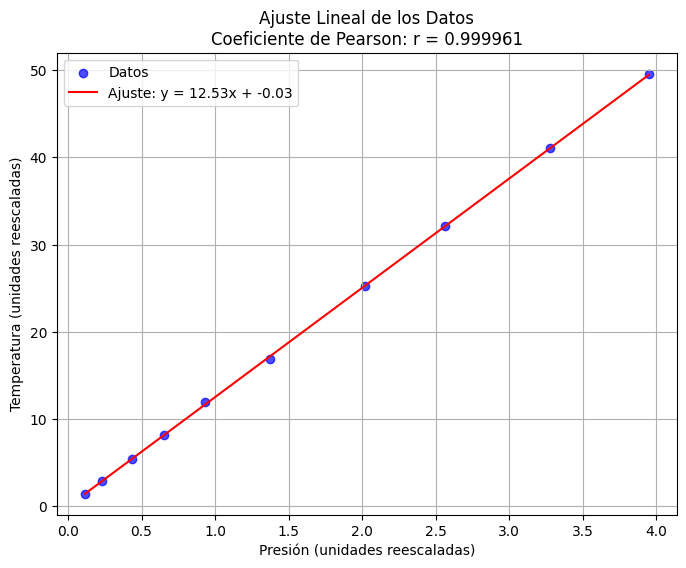

In [1]:
# APARTADO 3: MOSTRAR QUE LA PRESIÓN ES LINEAL CON RESPECTO A LA TEMPERATURA.

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import pearsonr

# Función lineal para el ajuste
def recta(x, m, b):
    return m * x + b

# Leer el archivo y procesar los datos
def leer_datos(filename):
    datos_x = []
    datos_y = []
    
    with open(filename, 'r') as file:
        lineas = file.readlines()[2:]  # Ignorar las primeras dos líneas
        
        for linea in lineas:
            columnas = linea.strip().split()  # Dividir por espacios
            if len(columnas) >= 3:  # Asegurarse de que haya al menos 3 columnas
                datos_x.append(float(columnas[1]))  # Segunda columna (eje X)
                datos_y.append(float(columnas[2]))  # Tercera columna (eje Y)
    
    return np.array(datos_x), np.array(datos_y)

# Función para ajustar y graficar
def ajustar_y_graficar(filename):
    # Leer los datos
    x, y = leer_datos(filename)
    
    # Ajustar los datos a una recta
    parametros, _ = curve_fit(recta, x, y)
    m, b = parametros
    
    # Calcular el coeficiente de Pearson
    r, _ = pearsonr(x, y)
    
    # Generar la recta ajustada
    x_ajustado = np.linspace(min(x), max(x), 500)
    y_ajustado = recta(x_ajustado, m, b)
    
    # Graficar los datos y la recta ajustada
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, color='blue', label='Datos', alpha=0.7)
    plt.plot(x_ajustado, y_ajustado, color='red', label=f'Ajuste: y = {m:.2f}x + {b:.2f}')
    plt.xlabel('Presión (unidades reescaladas)')
    plt.ylabel('Temperatura (unidades reescaladas)')
    plt.title(f'Ajuste Lineal de los Datos\nCoeficiente de Pearson: r = {r:.6f}')
    plt.legend()
    plt.grid(True)
    plt.savefig("Linealidad_presion_temperatura.png")
    plt.show()

# Archivo de entrada
archivo = "apartado3.txt"

# Ejecutar la función
ajustar_y_graficar(archivo)

Como he explicado en el apartado anterior, he usado la velocidad para incrementar la temperatura.

Podemos observar que la linealidad es casi perfecta, dando un coeficiente de pearson de 0.999961, casi 1. Podemos entonces concluir que tienen una relación de proporcionalidad lineal.

Esta relación se puede ver usando la fórmula del Gas Ideal. A una suficiente temperatura baja, como en nuestro caso, la relación viene dada por PV=NKT, que a N, V, K constante como en nuestro caso, se cumple esa linealidad.

También lo podemos ver desde la física estadística. Para el cálculo de la presión cada partícula aportará a la presión su velocidad cuadratica media. Como tenemos 2 grados de libertad por el teorema de equipartición la energía media de la particula será $$K_B T = 1/2 m <v^2>$$. Si sustituimos la presión en la velocidad, obtendremos esa relación lineal.